In [30]:
#imports
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV,train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

# Loading data

In [4]:
df = pd.read_csv('../data/df_clean_data.csv')
df.head()

,total_text,subreddit,target
0,"Hey There, Masa.",NYYankees,1
1,"Hey There, Masa [deleted]",NYYankees,1
2,1 more day until opening night!!!,NYYankees,1
3,Yankees clock in a few times in these predicti...,NYYankees,1
4,Tanaka on Instagram,NYYankees,1


In [6]:
X = df['total_text']
y = df['target']

# Count Vectorizing

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                 random_state=42, 
                                                 stratify=y)

In [8]:
cvec = CountVectorizer(
    ngram_range = (1,3),
    stop_words = 'english',
    max_features = 5_000
)

In [9]:
X_train_cvec = cvec.fit_transform(X_train)

X_test_cvec = cvec.transform(X_test)

# KNN

In [10]:
knn = KNeighborsClassifier()

In [31]:
params = {
    'n_neighbors': [3,5,7,9,11,13],
    'p':[1,2],
}

gs= GridSearchCV(knn,param_grid=params)
gs.fit(X_train_cvec, y_train)
print(gs.best_score_)
gs.best_params_

0.8453431536543586


{'n_neighbors': 7, 'p': 1}

In [32]:
gs.score(X_test_cvec, y_test)

0.8498131647025007

In [13]:
cross_val_score(knn, X_train_cvec, y_train).mean()

0.8430910828080304

In [14]:
knn.fit(X_train_cvec, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [17]:
knn.score(X_train_cvec, y_train)

0.8861632809505557

In [15]:
knn.score(X_test_cvec, y_test)

0.8469387755102041

# Confusion Matrix

In [19]:
preds = knn.predict(X_test_cvec)

tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

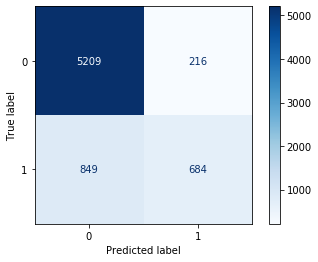

In [20]:
plot_confusion_matrix(knn, X_test_cvec, y_test, cmap='Blues', values_format='d');

## Accuracy
What percentage of observations are correctly predicted.

In [21]:
accuracy = (tp + tn) / (tp+fp+tn+fn)
print(f'The accuracy of the model is {round(accuracy,4)*100}%') 

The accuracy of the model is 84.69%


## Misclassification Rate
The percantage of observations that are incorrectly predicted.

In [24]:
print(f'The misclassication rate of the model is {round((1- accuracy),4)*100}%') 

The misclassication rate of the model is 15.310000000000002%


## Sensititivity
True postive rate.

In [25]:
sens = tp / (tp+fn)
sens
print(f'The true positive rate of the model is {round(sens,4)*100}%') 

The true positive rate of the model is 44.62%


## Specificity
True Negative rate

In [26]:
spec = tn /(tn+fp)
print(f'The true negative rate of the model is {round(spec,4)*100}%')

The true negative rate of the model is 96.02000000000001%


## Precision
Positive Predictive Value 

In [28]:
prec = tp /(tp + fp)
print(f'The precision if the model is {round(prec,4)*100}%')

The precision if the model is 76.0%
